# DDA3020 Assignment 1 Source Codes
Xue Zhongkai 122090636

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Problem 1

### Step 1

In [2]:
df = pd.read_csv('house_prices.csv')

In [3]:
df['Neighborhood'] = df['Neighborhood'].astype('category')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SqFt          128 non-null    int64   
 1   Bedrooms      128 non-null    int64   
 2   Bathrooms     128 non-null    int64   
 3   Neighborhood  128 non-null    category
 4   Price         128 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 4.4 KB
None


In [5]:
print(df.describe())

              SqFt    Bedrooms   Bathrooms          Price
count   128.000000  128.000000  128.000000     128.000000
mean   2000.937500    3.023438    2.445312  130427.343750
std     211.572431    0.725951    0.514492   26868.770371
min    1450.000000    2.000000    2.000000   69100.000000
25%    1880.000000    3.000000    2.000000  111325.000000
50%    2000.000000    3.000000    2.000000  125950.000000
75%    2140.000000    3.000000    3.000000  148250.000000
max    2590.000000    5.000000    4.000000  211200.000000


### Step 2

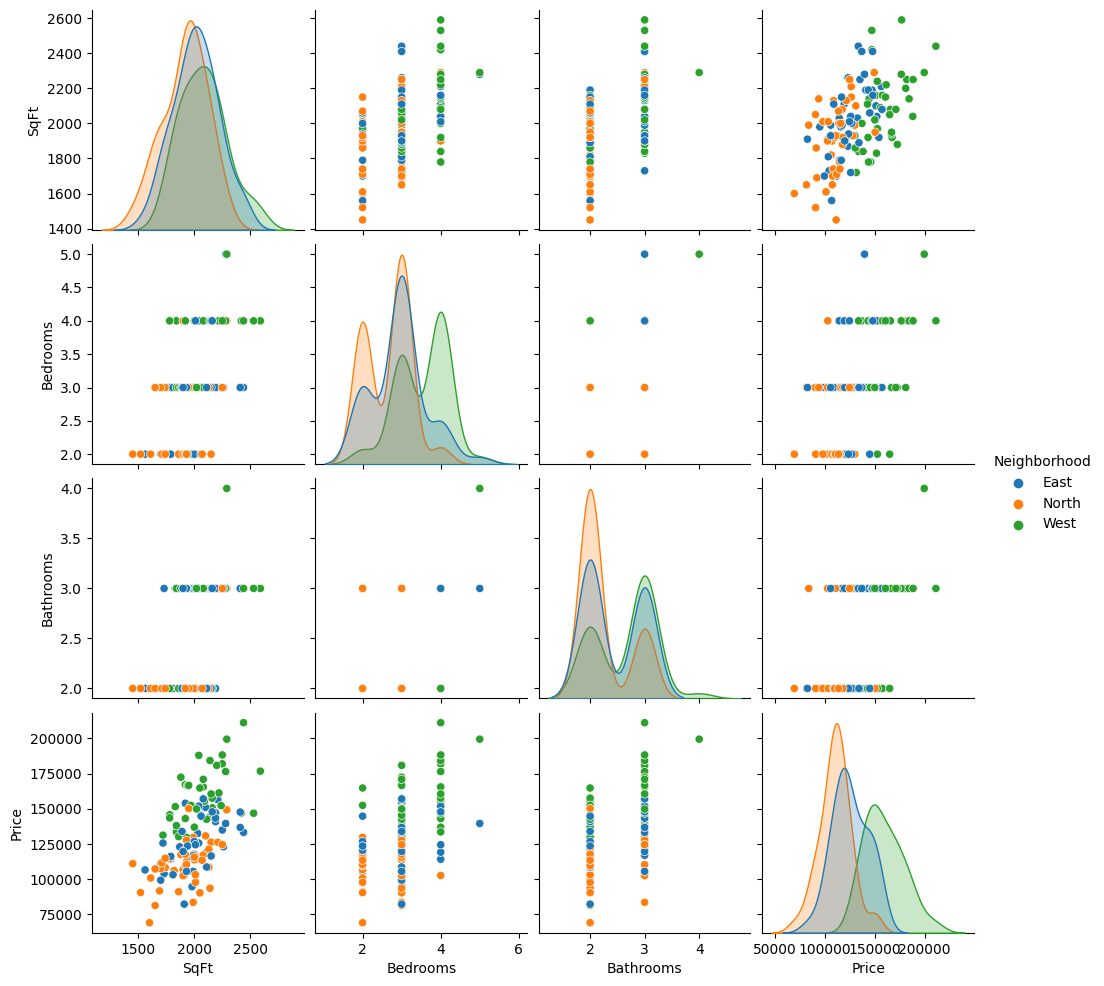

In [6]:
sns.pairplot(df, hue='Neighborhood', vars=['SqFt', 'Bedrooms', 'Bathrooms', 'Price'])
plt.show()

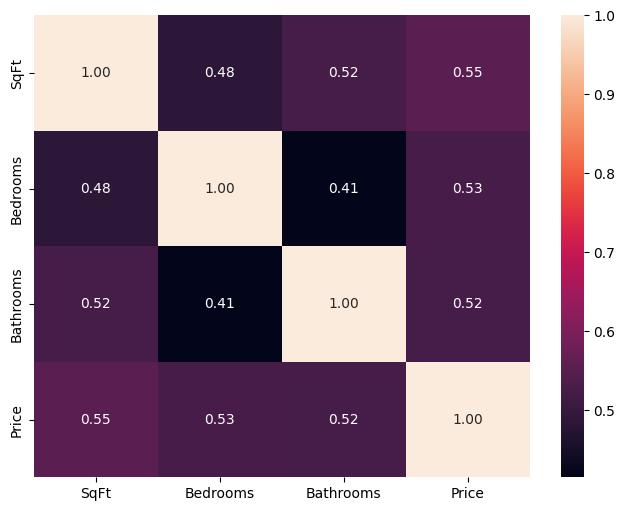

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

### Step 3

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [9]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Neighborhood'])],
    remainder='passthrough'
)

df_feature = df.drop('Price', axis=1)
df_encoded = column_transformer.fit_transform(df_feature)
df_encoded

array([[1.00e+00, 0.00e+00, 0.00e+00, 1.79e+03, 2.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.03e+03, 4.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.74e+03, 3.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.98e+03, 3.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.13e+03, 3.00e+00, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.78e+03, 3.00e+00, 2.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.83e+03, 3.00e+00, 3.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 2.16e+03, 4.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.11e+03, 4.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.73e+03, 3.00e+00, 3.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 2.03e+03, 3.00e+00, 2.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.87e+03, 2.00e+00, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.91e+03, 3.00e+00, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.15e+03, 3.00e+00, 3.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+

In [10]:
X = df_encoded  
y = df['Price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')

Training RMSE: 14067.463277743977
Testing RMSE: 16099.659294811487


## Problem 2

### Step 1

In [13]:
from sklearn.datasets import load_diabetes

In [14]:
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1) # convert to 2D array for future operations
X_intercept = np.c_[np.ones((X.shape[0], 1)), X]  # add intercept x0 = 1

In [15]:
def gradient_descent(X, y, lr, iteration):
    m = X.shape[0]
    w = np.random.randn(X.shape[1], 1)
    train_loss = []
    
    for iter_num in range(iteration):
        gradient = 2 / m * X.T.dot(X.dot(w) - y)
        w = w - lr * gradient
        loss = mean_squared_error(y, X.dot(w))
        train_loss.append(loss)
    
    return w, train_loss

In [16]:
w, _ = gradient_descent(X_intercept, y, lr=0.1, iteration=1000)
w

array([[ 152.13348416],
       [  48.62188838],
       [ -33.88349019],
       [ 259.20228751],
       [ 180.69330828],
       [  36.74267724],
       [  11.05814051],
       [-148.67232541],
       [ 133.15681545],
       [ 229.41816903],
       [ 128.69381856]])

### Step 2

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1) # convert to 2D array for future operations
X_intercept = np.c_[np.ones((X.shape[0], 1)), X]  # add intercept x0 = 1

X_train, X_test, y_train, y_test = train_test_split(X_intercept, y, test_size=0.2, random_state=45)

Training RMSE: 59.8207820526483
Testing RMSE: 52.17228026289637


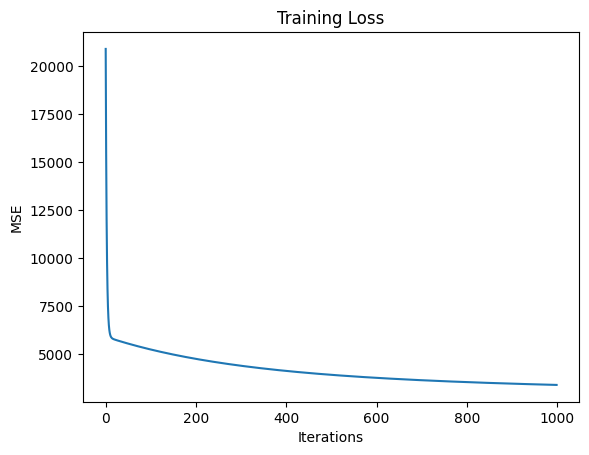

In [18]:
w, train_loss = gradient_descent(X_intercept, y, lr=0.1, iteration=1000)

y_train_pred = X_train.dot(w)
y_test_pred = X_test.dot(w)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Training RMSE: {rmse_train}')
print(f'Testing RMSE: {rmse_test}')

plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

### Step 3

In [19]:
data = load_diabetes()
X = data.data
y = data.target.reshape(-1, 1)  

X_intercept = np.c_[np.ones((X.shape[0], 1)), X] 

LR: 0.001, Iter: 100, Training RMSE: 148.43875239513594, Testing RMSE: 138.95015766869625
LR: 0.001, Iter: 500, Training RMSE: 96.09545220210317, Testing RMSE: 87.33948493082261
LR: 0.001, Iter: 1000, Training RMSE: 80.11635441257935, Testing RMSE: 73.36868534776762
LR: 0.01, Iter: 100, Training RMSE: 80.03026019011449, Testing RMSE: 73.33807671174453
LR: 0.01, Iter: 500, Training RMSE: 75.46306146124567, Testing RMSE: 70.74762001215615
LR: 0.01, Iter: 1000, Training RMSE: 73.30574582239798, Testing RMSE: 68.59483738461034
LR: 0.1, Iter: 100, Training RMSE: 73.4033568587962, Testing RMSE: 68.67753813791937
LR: 0.1, Iter: 500, Training RMSE: 63.313990851744734, Testing RMSE: 59.20155157820894
LR: 0.1, Iter: 1000, Training RMSE: 58.695639369569484, Testing RMSE: 55.59370288076822
LR: 1, Iter: 100, Training RMSE: 165.01428156838165, Testing RMSE: 163.35886323085265
LR: 1, Iter: 500, Training RMSE: 164.27078117953187, Testing RMSE: 167.6501735921125
LR: 1, Iter: 1000, Training RMSE: 166.76

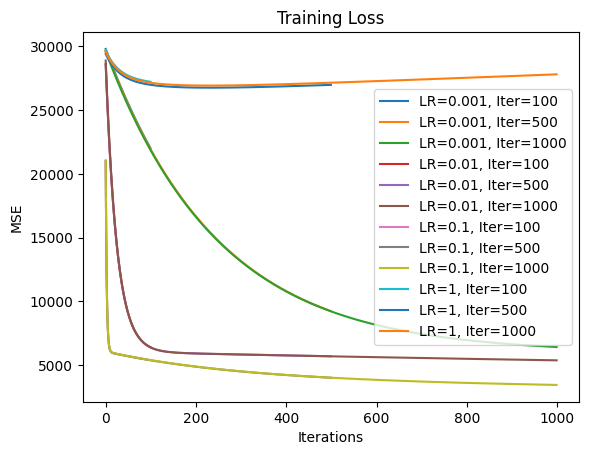

In [20]:
for lr in [0.001, 0.01, 0.1, 1]:
    for iteration in [100, 500, 1000]:
        X_train, X_test, y_train, y_test = train_test_split(X_intercept, y, test_size=0.2, random_state=42)
        
        w, train_loss = gradient_descent(X_train, y_train, lr, iteration)
        
        y_train_pred = X_train.dot(w)
        y_test_pred = X_test.dot(w)
        
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        print(f'LR: {lr}, Iter: {iteration}, Training RMSE: {rmse_train}, Testing RMSE: {rmse_test}')
        plt.plot(train_loss, label=f'LR={lr}, Iter={iteration}')

plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.legend()
plt.show()